# Creating Reusable Analysis Functions

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
filename = './data_files/multi_data.h5'
data = pd.read_hdf(filename, 'voltage_recording')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 200000 entries, (Sweep0001, 0) to (Sweep0005, 39999)
Data columns (total 4 columns):
Time         200000 non-null float64
Primary      200000 non-null float64
Secondary    200000 non-null float64
LED          200000 non-null float64
dtypes: float64(4)
memory usage: 7.6+ MB


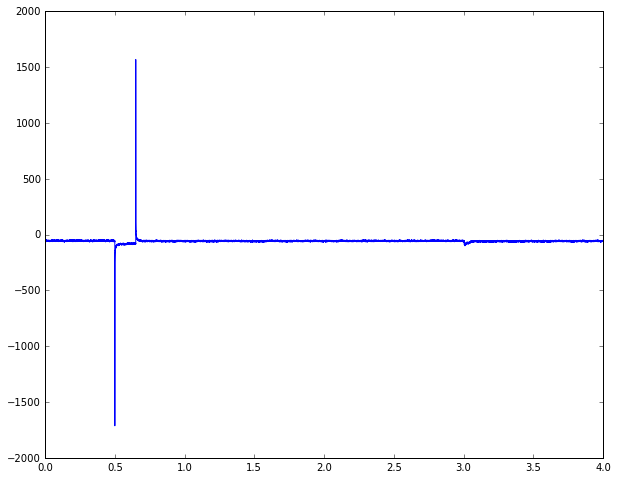

In [14]:
plt.figure(figsize=(10,8))
x = data['Time'].ix['Sweep0001']
y = data['Primary'].ix['Sweep0001']

plt.plot(x, y)

In [20]:
def baseline(df, start_time, end_time):
    """Subtracts from entire data column average of subset of data column
    defined by start and end times.

    Input Parameters
    ----------------
    df: data as pandas dataframe
        should contain Time and Primary columns
    start_time: positive number (seconds)
        designates beginning of region over which to average
    end_time: positive number (seconds)
        designates end of region over which to average

    Return
    ------
    df: dataframe with modified Primary column
    """

In [0]:
sweep1 = data.ix['Sweep0001'].copy()
sweep1 = baseline(sweep1, 1.5, 2.5)

plt.plot(sweep1.Time, sweep1.Primary)

In [0]:
def find_peak(df, start_time, end_time, sign="min"):
    """Returns min (or max) of data subset as a dataframe

    Input Parameters
    ----------------
    df: data as pandas dataframe
        should contain Time and Primary columns
    start_time: positive number (seconds)
        designates beginning of the epoch in which the event occurs
    end_time: positive number (seconds)
        designates end of the epoch in which the event occurs
    sign: string (either 'min' or 'max')
        indicates direction of event (min = neg going, max = pos going)

    Return
    -------
    peak_df: dataframe of Peak Amp and Peak Time
    """

In [0]:
find_peak(sweep1, 3.0, 3.0)

In [0]:
def calc_ppr(df, bsl_start, bsl_end, start_time, end_time, stim_interval,
             sign="min"):
    """Calculate paired-pulse ratio from current peaks

    Input Parameters
    -----------------
    df: data as pandas dataframe
        should contain Time and Primary columns
    bsl_start: positive number (time)
        designates beginning of epoch to use to baseline data
    bsl_end: positive number (time)
        designates end of epoch (time) to use to baseline data
    start_time: positive number (time)
        designates beginning of the epoch in which the event occurs
    end_time: positive number (time)
        designates end of the epoch in which the event occurs
    stim_interval: positive number (seconds)
        time between first stimulus and second stimulus
    sign: string (either 'min' or 'max')
        indicates direction of event (min = neg going, max = pos going)

    Return
    ------
    ppr_df: dataframe containing Peak 1 ampltiude, Peak 2 amplitude, and PPR
    """

In [0]:
# please note, there is no second stimulus here, so your second peak should be close to 0
# use a stimulus interval of 0.05 seconds
sweep2 = data.ix['Sweep0002'].copy()

calc_ppr(sweep2, 1.5, 2.5, 3.0, 3.5, 0.05)

## Using functions outside of a jupyter notebook

* Save python files with the .py file extension
* Edit them as simply text files
* Can then import those functions (in other files, a python repl, etc.)
* Allows us to organize functions into conceptually similar groups

We will talk more about import functions we have written and writing analysis scripts during another session.